In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
features_df = pd.read_csv('features.csv')

In [6]:
stores_df = pd.read_csv('stores.csv')

In [7]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [8]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [9]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

In [10]:
train_new = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how = 'left')

In [11]:
train_new = pd.merge(train_new, stores_df, on='Store', how = 'left')

In [12]:
train_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [13]:
train_new['Year'] = train_new['Date'].dt.year

In [14]:
train_new['Month'] = train_new['Date'].dt.month

In [15]:
train_new['Day'] = train_new['Date'].dt.day

In [16]:
train_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,5


In [17]:
def log_transform_WeeklySales(col):
    Weekly_Sales = col[0]
    
    if Weekly_Sales <= 0:
        return 0
    else:
        return np.log(Weekly_Sales)


In [18]:
#Log transform Weekly sales
train_new['Log_WeeklySales'] = train_new[['Weekly_Sales']].apply(log_transform_WeeklySales,axis=1)

In [19]:
#Function to have a temperature band
def temperature_band(col): 
    Temperature = col[0]
    if (Temperature < 0):
        return 'Less than 0'
    elif (Temperature >= 0) & (Temperature < 20):
        return 'Less than 20'
    elif (Temperature >= 20) & (Temperature < 40):
        return 'Less than 40'
    elif (Temperature >= 40) & (Temperature < 60):
        return 'Less than 60'
    elif (Temperature >= 60) & (Temperature < 70):
        return 'Less than 70'
    elif (Temperature >= 70) & (Temperature < 80):
        return 'Less than 80'
    else:
        return 'Greater than 80'
    

In [20]:
train_new['Temperature Band'] = train_new[['Temperature']].apply(temperature_band,axis=1)

In [21]:
#Function to have a CPI range
def CPI_RANGE(col): 
    CPI = col[0]
    if (CPI >= 125) &(CPI < 130):
        return 'Less than 130'
    elif (CPI >= 130) & (CPI < 135):
        return 'Between 130 and 135'
    elif (CPI >= 135) & (CPI < 140):
        return 'Between 135 and 140'
    elif (CPI >= 140) & (CPI < 145):
        return 'Between 140 and 145'
    elif (CPI >= 145) & (CPI < 190):
        return 'Between 145 and 190'
    elif (CPI >= 190) & (CPI < 210):
        return 'Between 190 and 210'
    elif (CPI >= 210) & (CPI < 230):
        return 'Between 210 and 230'


In [22]:
train_new['CPI_Range'] = train_new[['CPI']].apply(CPI_RANGE,axis=1)

In [23]:
train_new['MarkDown1'].isnull().sum()

270889

In [24]:
train_new['MarkDown2'].isnull().sum()

310322

In [25]:
train_new['MarkDown3'].isnull().sum()

284479

In [26]:
train_new['MarkDown4'].isnull().sum()

286603

In [27]:
train_new['MarkDown5'].isnull().sum()

270138

In [28]:
train_new['Store'].nunique() ## Number of unique stores

45

In [29]:
train_new['Dept'].nunique() ## Count of Depts

81

In [30]:
train_new['Year'].value_counts() #number of records in each year. Here it can be seen that 2011 has more data than the others

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [31]:
train_new['Store'].value_counts().head() #record count by stores

13    10474
10    10315
4     10272
1     10244
2     10238
Name: Store, dtype: int64

In [32]:
train_new['Dept'].value_counts().head()

1     6435
10    6435
38    6435
21    6435
67    6435
Name: Dept, dtype: int64

In [33]:
# Create new dataframe by taking only the features from the train_new dataframe that can be used for analysis
train_tseries = train_new[['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Weekly_Sales']]

In [34]:
train_tseries.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,2010-02-05,False,42.31,2.572,211.096358,8.106,A,151315,24924.50
1,1,1,2010-02-12,True,38.51,2.548,211.242170,8.106,A,151315,46039.49
2,1,1,2010-02-19,False,39.93,2.514,211.289143,8.106,A,151315,41595.55
3,1,1,2010-02-26,False,46.63,2.561,211.319643,8.106,A,151315,19403.54
4,1,1,2010-03-05,False,46.50,2.625,211.350143,8.106,A,151315,21827.90


In [35]:
#train_tseries['W-1'] = train_tseries.groupby(['Store', 'Dept'])[['Weekly_Sales']].shift(1)

In [36]:
train_tseries.set_index('Date', inplace=True)

In [37]:
train_tseries.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
Date,,,,,,,,,,
2010-02-05,1,1,False,42.31,2.572,211.096358,8.106,A,151315,24924.50
2010-02-12,1,1,True,38.51,2.548,211.242170,8.106,A,151315,46039.49
2010-02-19,1,1,False,39.93,2.514,211.289143,8.106,A,151315,41595.55
2010-02-26,1,1,False,46.63,2.561,211.319643,8.106,A,151315,19403.54
2010-03-05,1,1,False,46.50,2.625,211.350143,8.106,A,151315,21827.90


In [38]:
#Daily_Sales = train_tseries.loc[:,'Weekly_Sales'].resample('D').first().interpolate(method = 'linear')

### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date per department / store

In [39]:
#### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date per department / store
daily_sales = train_tseries.groupby(['Store', 'Dept']).resample('D')['Weekly_Sales'].first().interpolate(method='linear')

In [40]:
daily_sales = daily_sales.to_frame()

In [41]:
daily_sales.head(10)

Weekly_Sales
Store Dept Date                    
1     1    2010-02-05  24924.500000
           2010-02-06  27940.927143
           2010-02-07  30957.354286
           2010-02-08  33973.781429
           2010-02-09  36990.208571
           2010-02-10  40006.635714
           2010-02-11  43023.062857
           2010-02-12  46039.490000
           2010-02-13  45404.641429
           2010-02-14  44769.792857

In [42]:
daily_sales['t-1'] = daily_sales['Weekly_Sales'].shift(1)
daily_sales['t-3'] = daily_sales['Weekly_Sales'].shift(3)
daily_sales['t-7'] = daily_sales['Weekly_Sales'].shift(7)

In [43]:
daily_sales.head(10)

Weekly_Sales           t-1           t-3           t-7
Store Dept Date                                                              
1     1    2010-02-05  24924.500000           NaN           NaN           NaN
           2010-02-06  27940.927143  24924.500000           NaN           NaN
           2010-02-07  30957.354286  27940.927143           NaN           NaN
           2010-02-08  33973.781429  30957.354286  24924.500000           NaN
           2010-02-09  36990.208571  33973.781429  27940.927143           NaN
           2010-02-10  40006.635714  36990.208571  30957.354286           NaN
           2010-02-11  43023.062857  40006.635714  33973.781429           NaN
           2010-02-12  46039.490000  43023.062857  36990.208571  24924.500000
           2010-02-13  45404.641429  46039.490000  40006.635714  27940.927143
           2010-02-14  44769.792857  45404.641429  43023.062857  30957.354286

In [44]:
#min(t-1,t-2)
daily_sales['Min_1d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=2).min()
daily_sales['Max_1d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=2).max()
daily_sales['Mean_1d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=2).mean()
daily_sales['Median_1d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=2).median()
daily_sales['std_1d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=2).std()

In [45]:
daily_sales.head(10)

Weekly_Sales           t-1           t-3           t-7  \
Store Dept Date                                                                 
1     1    2010-02-05  24924.500000           NaN           NaN           NaN   
           2010-02-06  27940.927143  24924.500000           NaN           NaN   
           2010-02-07  30957.354286  27940.927143           NaN           NaN   
           2010-02-08  33973.781429  30957.354286  24924.500000           NaN   
           2010-02-09  36990.208571  33973.781429  27940.927143           NaN   
           2010-02-10  40006.635714  36990.208571  30957.354286           NaN   
           2010-02-11  43023.062857  40006.635714  33973.781429           NaN   
           2010-02-12  46039.490000  43023.062857  36990.208571  24924.500000   
           2010-02-13  45404.641429  46039.490000  40006.635714  27940.927143   
           2010-02-14  44769.792857  45404.641429  43023.062857  30957.354286   

                             Min_1d        Max_1d       Mean_1d     Median_1d  \
Store Dept Date                                                                 
1     1    2010-02-05           NaN           NaN           NaN           NaN   
           2010-02-06           NaN           NaN           NaN           NaN   
           2010-02-07  24924.500000  27940.927143  26432.713571  26432.713571   
           2010-02-08  27940.927143  30957.354286  29449.140714  29449.140714   
           2010-02-09  30957.354286  33973.781429  32465.567857  32465.567857   
           2010-02-10  33973.781429  36990.208571  35481.995000  35481.995000   
           2010-02-11  36990.208571  40006.635714  38498.422143  38498.422143   
           2010-02-12  40006.635714  43023.062857  41514.849286  41514.849286   
           2010-02-13  43023.062857  46039.490000  44531.276429  44531.276429   
           2010-02-14  45404.641429  46039.490000  45722.065714  45722.065714   

                            std_1d  
Store Dept Date                     
1     1    2010-02-05          NaN  
           2010-02-06          NaN  
           2010-02-07  2132.936088  
           2010-02-08  2132.936088  
           2010-02-09  2132.936088  
           2010-02-10  2132.936088  
           2010-02-11  2132.936088  
           2010-02-12  2132.936088  
           2010-02-13  2132.936088  
           2010-02-14   448.905730

In [46]:
#daily_sales.columns = colnames

In [47]:
#colnames = ['Weekly_Sales', 't-1', 't-3', 't-7', 'Min_1d', 'Max_1d', 'Mean_1d', 'Median_1d', 'Std_1d']

In [48]:
#width = 4
#shifted = daily_sales['Weekly_Sales'].shift(width-1)
#window = shifted.rolling(window=width)
#daily_sales = pd.concat([daily_sales, window.min(), window.mean(), window.max()],axis=1)

In [49]:
# min(t-1,t-2,t-3,t-4)
daily_sales['Min_3d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=4).min()
daily_sales['Max_3d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=4).max()
daily_sales['Mean_3d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=4).mean()
daily_sales['Median_3d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=4).median()
daily_sales['std_3d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=4).std()

In [50]:
#min(t-1,t-2,t-3,t-4,t-5,t-6,t-7) etc.
daily_sales['Min_7d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=8).min()
daily_sales['Max_7d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=8).max()
daily_sales['Mean_7d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=8).mean()
daily_sales['Median_7d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=8).median()
daily_sales['std_7d'] = daily_sales['Weekly_Sales'].shift(1).rolling(window=8).std()

#### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date per department / store result

In [51]:
daily_sales.head(10)

Weekly_Sales           t-1           t-3           t-7  \
Store Dept Date                                                                 
1     1    2010-02-05  24924.500000           NaN           NaN           NaN   
           2010-02-06  27940.927143  24924.500000           NaN           NaN   
           2010-02-07  30957.354286  27940.927143           NaN           NaN   
           2010-02-08  33973.781429  30957.354286  24924.500000           NaN   
           2010-02-09  36990.208571  33973.781429  27940.927143           NaN   
           2010-02-10  40006.635714  36990.208571  30957.354286           NaN   
           2010-02-11  43023.062857  40006.635714  33973.781429           NaN   
           2010-02-12  46039.490000  43023.062857  36990.208571  24924.500000   
           2010-02-13  45404.641429  46039.490000  40006.635714  27940.927143   
           2010-02-14  44769.792857  45404.641429  43023.062857  30957.354286   

                             Min_1d        Max_1d       Mean_1d     Median_1d  \
Store Dept Date                                                                 
1     1    2010-02-05           NaN           NaN           NaN           NaN   
           2010-02-06           NaN           NaN           NaN           NaN   
           2010-02-07  24924.500000  27940.927143  26432.713571  26432.713571   
           2010-02-08  27940.927143  30957.354286  29449.140714  29449.140714   
           2010-02-09  30957.354286  33973.781429  32465.567857  32465.567857   
           2010-02-10  33973.781429  36990.208571  35481.995000  35481.995000   
           2010-02-11  36990.208571  40006.635714  38498.422143  38498.422143   
           2010-02-12  40006.635714  43023.062857  41514.849286  41514.849286   
           2010-02-13  43023.062857  46039.490000  44531.276429  44531.276429   
           2010-02-14  45404.641429  46039.490000  45722.065714  45722.065714   

                            std_1d        Min_3d        Max_3d       Mean_3d  \
Store Dept Date                                                                
1     1    2010-02-05          NaN           NaN           NaN           NaN   
           2010-02-06          NaN           NaN           NaN           NaN   
           2010-02-07  2132.936088           NaN           NaN           NaN   
           2010-02-08  2132.936088           NaN           NaN           NaN   
           2010-02-09  2132.936088  24924.500000  33973.781429  29449.140714   
           2010-02-10  2132.936088  27940.927143  36990.208571  32465.567857   
           2010-02-11  2132.936088  30957.354286  40006.635714  35481.995000   
           2010-02-12  2132.936088  33973.781429  43023.062857  38498.422143   
           2010-02-13  2132.936088  36990.208571  46039.490000  41514.849286   
           2010-02-14   448.905730  40006.635714  46039.490000  43618.457500   

                          Median_3d       std_3d        Min_7d    Max_7d  \
Store Dept Date                                                            
1     1    2010-02-05           NaN          NaN           NaN       NaN   
           2010-02-06           NaN          NaN           NaN       NaN   
           2010-02-07           NaN          NaN           NaN       NaN   
           2010-02-08           NaN          NaN           NaN       NaN   
           2010-02-09  29449.140714  3894.190696           NaN       NaN   
           2010-02-10  32465.567857  3894.190696           NaN       NaN   
           2010-02-11  35481.995000  3894.190696           NaN       NaN   
           2010-02-12  38498.422143  3894.190696           NaN       NaN   
           2010-02-13  41514.849286  3894.190696  24924.500000  46039.49   
           2010-02-14  44213.852143  2735.665841  27940.927143  46039.49   

                            Mean_7d     Median_7d       std_7d  
Store Dept Date                                                 
1     1    2010-02-05           NaN           NaN          NaN  
        

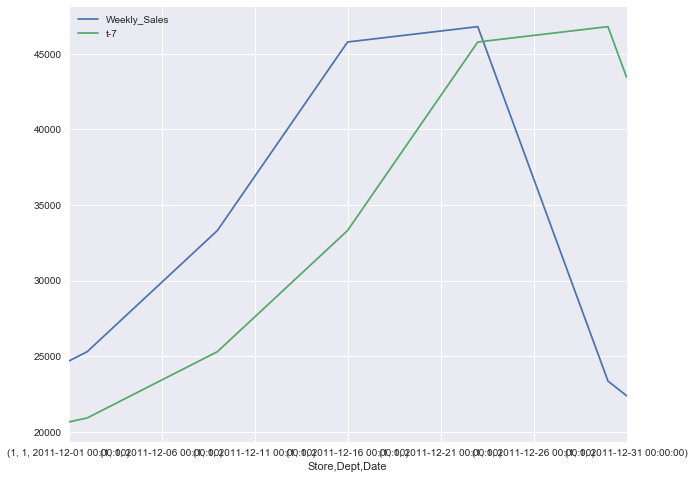

In [52]:
daily_sales.loc[(1,1,slice('2011-12-01','2011-12-31')),('Weekly_Sales','t-7')].plot(figsize=(10,8))

#### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date in all stores (overall trend)

In [53]:
#### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date in all stores (overall trend)
stores_sales = train_tseries.resample('D')['Weekly_Sales'].sum().interpolate(method='linear')

In [54]:
stores_sales = stores_sales.to_frame()

In [55]:
stores_sales.head()

,Weekly_Sales
Date,
2010-02-05,4.975074e+07
2010-02-06,4.954873e+07
2010-02-07,4.934672e+07
2010-02-08,4.914471e+07
2010-02-09,4.894270e+07


In [56]:
stores_sales['Log_Sales']=np.log(stores_sales['Weekly_Sales'])

In [57]:
del(stores_sales['Weekly_Sales'])

In [58]:
stores_sales.head()

,Log_Sales
Date,
2010-02-05,17.722536
2010-02-06,17.718467
2010-02-07,17.714382
2010-02-08,17.710280
2010-02-09,17.706161


In [59]:
stores_sales['t-1'] = stores_sales['Log_Sales'].shift(1)
stores_sales['t-3'] = stores_sales['Log_Sales'].shift(3)
stores_sales['t-7'] = stores_sales['Log_Sales'].shift(7)

#min(t-1,t-2)
stores_sales['Min_1d'] = stores_sales['Log_Sales'].shift(1).rolling(window=2).min()
stores_sales['Max_1d'] = stores_sales['Log_Sales'].shift(1).rolling(window=2).max()
stores_sales['Mean_1d'] = stores_sales['Log_Sales'].shift(1).rolling(window=2).mean()
stores_sales['Median_1d'] = stores_sales['Log_Sales'].shift(1).rolling(window=2).median()
stores_sales['std_1d'] = stores_sales['Log_Sales'].shift(1).rolling(window=2).std()


#min(t-1,t-2,t-3,t-4)
stores_sales['Min_3d'] = stores_sales['Log_Sales'].shift(1).rolling(window=4).min()
stores_sales['Max_3d'] = stores_sales['Log_Sales'].shift(1).rolling(window=4).max()
stores_sales['Mean_3d'] = stores_sales['Log_Sales'].shift(1).rolling(window=4).mean()
stores_sales['Median_3d'] = stores_sales['Log_Sales'].shift(1).rolling(window=4).median()
stores_sales['std_3d'] = stores_sales['Log_Sales'].shift(1).rolling(window=4).std()


#min(t-1,t-2,t-3,t-4,t-5,t-6,t-7) etc.
stores_sales['Min_7d'] = stores_sales['Log_Sales'].shift(1).rolling(window=8).min()
stores_sales['Max_7d'] = stores_sales['Log_Sales'].shift(1).rolling(window=8).max()
stores_sales['Mean_7d'] = stores_sales['Log_Sales'].shift(1).rolling(window=8).mean()
stores_sales['Median_7d'] = stores_sales['Log_Sales'].shift(1).rolling(window=8).median()
stores_sales['std_7d'] = stores_sales['Log_Sales'].shift(1).rolling(window=8).std()

In [60]:
stores_sales.head()

,Log_Sales,t-1,t-3,t-7,Min_1d,Max_1d,Mean_1d,Median_1d,std_1d,Min_3d,Max_3d,Mean_3d,Median_3d,std_3d,Min_7d,Max_7d,Mean_7d,Median_7d,std_7d
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,17.722536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-06,17.718467,17.722536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-07,17.714382,17.718467,NaN,NaN,17.718467,17.722536,17.720502,17.720502,0.002877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,17.710280,17.714382,17.722536,NaN,17.714382,17.718467,17.716425,17.716425,0.002889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-09,17.706161,17.710280,17.718467,NaN,17.710280,17.714382,17.712331,17.712331,0.002901,17.71028,17.722536,17.716416,17.716425,0.005274,NaN,NaN,NaN,NaN,NaN


In [61]:
train_tseries.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
Date,,,,,,,,,,
2010-02-05,1,1,False,42.31,2.572,211.096358,8.106,A,151315,24924.50
2010-02-12,1,1,True,38.51,2.548,211.242170,8.106,A,151315,46039.49
2010-02-19,1,1,False,39.93,2.514,211.289143,8.106,A,151315,41595.55
2010-02-26,1,1,False,46.63,2.561,211.319643,8.106,A,151315,19403.54
2010-03-05,1,1,False,46.50,2.625,211.350143,8.106,A,151315,21827.90


### change in Unemployment rate in last week / month / quarter

In [62]:
unemp = train_tseries[['Unemployment']]

In [63]:
unemp_Monthly = unemp.resample('M').mean()

In [64]:
unemp_Monthly['PctChange'] = unemp_Monthly['Unemployment'].pct_change()

In [65]:
unemp_Monthly.head(10)

,Unemployment,PctChange
Date,,
2010-02-28,8.570455,NaN
2010-03-31,8.575151,0.000548
2010-04-30,8.446687,-0.014981
2010-05-31,8.450495,0.000451
2010-06-30,8.452238,0.000206
2010-07-31,8.381368,-0.008385
2010-08-31,8.385104,0.000446
2010-09-30,8.382072,-0.000362
2010-10-31,8.429697,0.005682


In [66]:
unemp['PctChange_Wkly'] = unemp['Unemployment'].pct_change()

C:\Sumithra\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
unemp.head(10)

,Unemployment,PctChange_Wkly
Date,,
2010-02-05,8.106,NaN
2010-02-12,8.106,0.000000
2010-02-19,8.106,0.000000
2010-02-26,8.106,0.000000
2010-03-05,8.106,0.000000
2010-03-12,8.106,0.000000
2010-03-19,8.106,0.000000
2010-03-26,8.106,0.000000
2010-04-02,7.808,-0.036763
